## Synthoseis Quick Start Notebook

Synthoseis is an open source, Python-based tool used for generating pseudo-random seismic data. The goal of Synthoseis is to generate realistic seismic data for deep learning training. This notebook will serve as a guide to getting your first Synthoseis model up and running. Future notebooks will discuss seismic outputs, visualizations, and building a custom rock properties model.

### Environment Build

To install the necessary packages, use the `environment.yml` file to create a virtual or conda environment. Please note that the most recent version of Synthoseis has been refactored to work with Python 3.10.

### Imports

Within the main directory of the repo is a script called `main.py`. This is the primary script to run the program. Import `main.py`, along with visualization tools to view the results.

In [5]:
import main as mn 
import numpy as np
import json
import pprint as pp
import matplotlib.pyplot as plt

### Building your first model

The config json file is the method for defining some of the key aspects of your seismic survey including survey size, seismic bandwith, column height range, number of faults, sand thickness ranges, and the presence of geobodies like salt and channels. Please note that setting `include_channels: True` will signifcantly increase compute time and memory consumption. Below is an example config file that can be found in `./config/example.json`.

In [2]:
rock_model = json.load(open('./config/example.json', 'r'))
pp.pprint(rock_model)

{'bandwidth_high': [20.0, 35.0],
 'bandwidth_low': [3.0, 6.0],
 'bandwidth_ord': 4,
 'basin_floor_fans': False,
 'broadband_qc_volume': False,
 'closure_types': ['simple', 'faulted', 'onlap'],
 'cube_shape': [300, 300, 1250],
 'digi': 4,
 'dip_factor_max': 2,
 'extra_qc_plots': True,
 'incident_angles': [7, 15, 24],
 'include_channels': False,
 'include_salt': True,
 'infill_factor': 10,
 'initial_layer_stdev': [7.0, 25.0],
 'max_column_height': [150.0, 150.0],
 'max_number_faults': 6,
 'min_closure_voxels_faulted': 2500,
 'min_closure_voxels_onlap': 500,
 'min_closure_voxels_simple': 500,
 'min_number_faults': 1,
 'model_qc_volumes': True,
 'multiprocess_bp': True,
 'pad_samples': 10,
 'partial_voxels': True,
 'project': 'example',
 'project_folder': '/scratch/synthoseis_example',
 'sand_layer_fraction': {'max': 0.25, 'min': 0.05},
 'sand_layer_thickness': 2,
 'seabed_min_depth': [20, 50],
 'signal_to_noise_ratio_db': [7.5, 12.5, 17.5],
 'thickness_max': 12,
 'thickness_min': 2,
 'var

### Running the model

Once you've defined the parameters of your seismic data, call the `build_model()` function in `main.py`. This will take the config `.json` file as an input, as well as a `run_id` defined by the user. Users also have the option to use `test_mode`. Test mode can take an integer as an input and returns a smaller seismic volume than defined in the config file. This is great for testing prior to running the full size model.

In [3]:
mn.build_model(user_json='./config/example.json', run_id=1,test_mode=50)

------------------------------------
Testing Mode
Output Folder: /tmp/synthoseis_example_test_mode_
Cube_Shape: (50, 50, 1250)
------------------------------------
Coherent smiles will be inserted
Salt will be inserted. noise_stretch_factor = 1.18

Model folder: /tmp/synthoseis_example_test_mode_/seismic__2024.07743805_1
Creating directory: /tmp/synthoseis_example_test_mode_/seismic__2024.07743805_1
Creating directory: /tmp/temp_folder__2024.07743805_1_1__2024.07743805

Keyfile created at /tmp/synthoseis_example_test_mode_/seismic__2024.07743805_1/seismicCube_2024.07743805.key
self.cfg.num_lyr_lut =  25000
onlap_layer_list =  [ 18  29  63  64 152]
Number of onlapping flags: 5
 ... horizon number for first onlap episode = 18
 ... number of channelFlags: 0
 ... horizon number for first channel episode: 0
	Indices for shallowest point in cube: 31, 49
Building random depth map at base of model
azi, dip, dipping_plane min/mean/max = 83.7437265828555, 0.18226224122652535, 0.00, 0.12, 0.24
cu

  0%|          | 0/5 [00:00<?, ?it/s]



 ... inserting fault 0 with throw 26.04
   ... fault ellipsoid semi-axes (a, b, c): 200.91, 577.04, 6143.57
   ... fault ellipsoid origin (x, y, z): 243.00, 39.34, -618.70
   ... tilt_pct: 18.09
   ...z for bottom of ellipsoid at depth (samples) = -3801041.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 65.40399222911924
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  47
    ... y idx for max displacement  =  26
    ... z idx for max displacement  =  127
    ... ellipsoid value  =  1.006255576625509
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 127
    ... This fault has  0.9% of downthrown samples
   ... Taper fault so it doesn't reach seabed
    ... Sea floor max

 20%|██        | 1/5 [00:01<00:06,  1.71s/it]

   ...hockey_sticks = , [0]


 ... inserting fault 1 with throw 28.06
   ... fault ellipsoid semi-axes (a, b, c): 199.09, 539.35, 6143.57
   ... fault ellipsoid origin (x, y, z): -192.70, 46.55, -618.70
   ... tilt_pct: 19.93
   ...z for bottom of ellipsoid at depth (samples) = -3801041.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 64.5649572311196
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  2
    ... y idx for max displacement  =  21
    ... z idx for max displacement  =  94
    ... ellipsoid value  =  1.0041922918345059
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 94
    ... This fault has  0.7% of downthrown samples
   ... Taper fault so it doesn't reach se

 40%|████      | 2/5 [00:04<00:06,  2.11s/it]

   ...hockey_sticks = , [0, 0]


 ... inserting fault 2 with throw 27.47
   ... fault ellipsoid semi-axes (a, b, c): 201.44, 629.23, 6143.57
   ... fault ellipsoid origin (x, y, z): 211.81, 38.75, -618.70
   ... tilt_pct: 19.15
   ...z for bottom of ellipsoid at depth (samples) = -3801041.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 37.57128701145759
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  30
    ... y idx for max displacement  =  25
    ... z idx for max displacement  =  560
    ... ellipsoid value  =  1.0007085905962043
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 560
    ... This fault has 34.0% of downthrown samples
   ... Taper fault so it doesn't re

 60%|██████    | 3/5 [00:06<00:04,  2.31s/it]

   ...hockey_sticks = , [0, 0, 0]


 ... inserting fault 3 with throw 32.32
   ... fault ellipsoid semi-axes (a, b, c): 207.76, 631.53, 6143.57
   ... fault ellipsoid origin (x, y, z): -183.24, 41.82, -618.70
   ... tilt_pct: 16.63
   ...z for bottom of ellipsoid at depth (samples) = -3801041.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 47.747850877040435
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  11
    ... y idx for max displacement  =  20
    ... z idx for max displacement  =  386
    ... ellipsoid value  =  1.0001653988467187
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 386
    ... This fault has 14.0% of downthrown samples
   ... Taper fault so it doesn

 80%|████████  | 4/5 [00:09<00:02,  2.60s/it]

   ...hockey_sticks = , [0, 0, 0, 1]


 ... inserting fault 4 with throw 15.56
   ... fault ellipsoid semi-axes (a, b, c): 181.72, 535.04, 6143.57
   ... fault ellipsoid origin (x, y, z): 242.37, 40.37, -618.70
   ... tilt_pct: 18.33
   ...z for bottom of ellipsoid at depth (samples) = -3801041.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 20.36105960876583
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
    ... Empty intersection between fault and cube, assign d-max at cube lower corner
  ... Ellipsoid larger than cube no fault inserted


100%|██████████| 5/5 [00:09<00:00,  2.00s/it]

   ... interpolation = False
   ... elapsed time for skimage.label = 0:00:00.008668
   ... number_fault_intersections = 1


	   ... Cube parameters going into interpolation
	   ... Origtime shape  = 1260
	   ... stretch_times_effects shape  = (50, 50, 1260)
	   ... unstretch_times shape  = (50, 50, 1260)
	   ... traces shape  = (50, 50, 1260)
	   ... Cube parameters going into interpolation
	   ... Origtime shape  = 1260
	   ... stretch_times_effects shape  = (50, 50, 1260)
	   ... unstretch_times shape  = (50, 50, 1260)
	   ... traces shape  = (50, 50, 1260)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  212 (0,) (291,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  211 (0,) (754,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  210 (0,) (201,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_t

/Users/Mike.McIntire/anaconda3/envs/synthoseis/lib/python3.9/site-packages/skimage/_shared/utils.py:157: UserWarning:

Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?



labels_clean succeeded.
 labels.min:0, labels.max: 18
 labels_clean min:0, labels_clean max: 14
 Inside parse_label_values_and_counts
Label: 1, label_values: 14, label_counts: 734
labels_clean succeeded.
 labels.min:0, labels.max: 140
 labels_clean min:0, labels_clean max: 89
 Inside parse_label_values_and_counts
Label: 1, label_values: 1, label_counts: 594
Label: 2, label_values: 3, label_counts: 938
Label: 3, label_values: 4, label_counts: 558
Label: 4, label_values: 6, label_counts: 965
Label: 5, label_values: 13, label_counts: 564
Label: 6, label_values: 14, label_counts: 708
Label: 7, label_values: 26, label_counts: 569
Label: 8, label_values: 29, label_counts: 10130
Label: 9, label_values: 40, label_counts: 829
Label: 10, label_values: 43, label_counts: 783
Label: 11, label_values: 69, label_counts: 9820
Label: 12, label_values: 76, label_counts: 686
Label: 13, label_values: 89, label_counts: 682
 labels_clean.min(), labels_clean.max() =  0 1
Voxel Count: 734	Fluid type: 1
Filter

/Users/Mike.McIntire/anaconda3/envs/synthoseis/lib/python3.9/site-packages/skimage/_shared/utils.py:157: UserWarning:

Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?




    ... grow_to_fault2: n_faulted_closures =  0
    ... grow_to_fault2: faulted_closures =  []
Size before editing: 3150000
Size after editing: 3150000


 ... grow_to_fault2: grow closures laterally and up within layer and within fault block ...

    ... grow_to_fault2: n_faulted_closures =  0
    ... grow_to_fault2: faulted_closures =  []
Size before editing: 3150000
Size after editing: 3150000


 ... grow_to_fault2: grow closures laterally and up within layer and within fault block ...

    ... grow_to_fault2: n_faulted_closures =  1
    ... grow_to_fault2: faulted_closures =  [1.0]
Voxel_Sizes: 1408
    ... grow_to_fault2: fault_blocks_list =  [0.0, 54.465050840358366]


    ... label, throw =  1.0 0.0 [0.0, 54.465050840358366] 884 1695603 882
Label: 1.0, fault_block: 0.0, Voxel_Count: 882

    ... grow_to_fault2: closure_boundary_cube voxels =  909168

    ... closure label number, avg_throw, geobody shape, geo_age min/mean/max, depth min/max, avg_ng =  1.0 0.0 882 (63.5, 147, 162

Calculating Zoeppritz for 5 angles: 100%|██████████| 50/50 [00:03<00:00, 15.68it/s]



...adding random noise to 5 cubes...
S/N ratio = 7.7423
	...Normalised noise3d for angle 0:	Min: -0.0588, mean: 0.0000, max: 0.0621, std: 0.0062
	S/N ratio = 7.7 dB.
	std_ratio = 2.4385
	data_std = 0.0151
	noise_std = 0.0142
	...Normalised noise3d for angle 7:	Min: -0.0507, mean: 0.0000, max: 0.0498, std: 0.0062
	S/N ratio = 7.7 dB.
	std_ratio = 2.4385
	data_std = 0.0151
	noise_std = 0.0101
	...Normalised noise3d for angle 15:	Min: -0.0512, mean: 0.0000, max: 0.0503, std: 0.0062
	S/N ratio = 7.7 dB.
	std_ratio = 2.4385
	data_std = 0.0151
	noise_std = 0.0101
	...Normalised noise3d for angle 24:	Min: -0.0570, mean: -0.0000, max: 0.0605, std: 0.0062
	S/N ratio = 7.7 dB.
	std_ratio = 2.4385
	data_std = 0.0151
	noise_std = 0.0119
	...Normalised noise3d for angle 45:	Min: -0.0559, mean: 0.0000, max: 0.0575, std: 0.0062
	S/N ratio = 7.7 dB.
	std_ratio = 2.4385
	data_std = 0.0151
	noise_std = 0.0110
Data Min: -0.64, Data Max: 0.86
	... Low Frequency; 4.85 Hz, High Frequency: 25.93 Hz
	... sta

/Users/Mike.McIntire/mikes_sandbox/synthoseis/datagenerator/Closures.py:3356: RuntimeWarning:

invalid value encountered in divide

/Users/Mike.McIntire/mikes_sandbox/synthoseis/datagenerator/Closures.py:3356: RuntimeWarning:

invalid value encountered in divide



layers for closure computation: [  1   2   3  12  14  15  35  38  39  40  43  44  46  47  48  63  64  66
  67  68  78  84  93  94 102 103 121 122 124 126 135 136 140 141 160 162
 166 176 178 192 196 197]
Number of HC Closures : 1
Closure voxel count: 734 - 0.02%
Closure voxel count: (brine) 0 - 0.00%
Closure voxel count: (oil) 734 - 0.02%
Closure voxel count: (gas) 0 - 0.00%




...elapsed time is 0:01:01.988780


'/tmp/synthoseis_example_test_mode_/seismic__2024.07743805_1'

Let's check to see if the test mode seismic data successfully wrote to a temp location. If the data looks correct, turn off test mode and run the full model. A full model of size `(300,300,1250)` will take 30-60 minutes to complete.

In [8]:
seismic = np.load('/tmp/synthoseis_example_test_mode_/seismic__2024.06761594_1/seismicCubes_RFC_fullstack_2024.06761594.npy')
print(seismic.shape)

(50, 50, 1259)


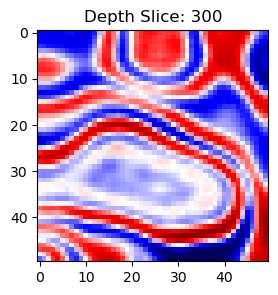

In [14]:
plt.figure(figsize=(3,3))
plt.title('Depth Slice: 300')
plt.imshow(seismic[...,300], cmap=plt.cm.seismic)
plt.show()